In [46]:
pip install requests pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [47]:
import requests
import pandas as pd

# Replace with your TMDb API key
API_KEY = '2caf28e58a940eb268e5b3c9daba82d1'

# Function to fetch movies for a specific year and page
def fetch_movies(api_key, year, page=1):
    url = f'https://api.themoviedb.org/3/discover/movie?api_key={api_key}&sort_by=popularity.desc&primary_release_year={year}&page={page}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['results']
    else:
        print(f"Error fetching data for year {year}, page {page}: {response.status_code}")
        return []

# Fetch data for the last decade (2013-2023) with multiple pages
movies_data = []
for year in range(2013, 2024):
    print(f"Fetching data for year {year}...")
    for page in range(1, 6):  # Fetch up to 5 pages per year (20 movies per page = 100 movies per year)
        movies_data.extend(fetch_movies(API_KEY, year, page))

# Convert to DataFrame
movies_df = pd.DataFrame(movies_data)

# Save to CSV for later use
movies_df.to_csv('large_movies_data.csv', index=False)
print(f"Data saved to large_movies_data.csv. Total movies fetched: {len(movies_df)}")

Fetching data for year 2013...
Fetching data for year 2014...
Fetching data for year 2015...
Fetching data for year 2016...
Fetching data for year 2017...
Fetching data for year 2018...
Fetching data for year 2019...
Fetching data for year 2020...
Fetching data for year 2021...
Fetching data for year 2022...
Fetching data for year 2023...
Data saved to large_movies_data.csv. Total movies fetched: 1100


In [48]:
# Load the data
movies_df = pd.read_csv('large_movies_data.csv')

# Check for missing values
print(movies_df.isnull().sum())

# Drop rows with missing values
movies_df.dropna(inplace=True)

# Convert release_date to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract year and month for analysis
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df['release_month'] = movies_df['release_date'].dt.month

# Display cleaned data
print(movies_df.head())

adult                0
backdrop_path        7
genre_ids            0
id                   0
original_language    0
original_title       0
overview             4
popularity           0
poster_path          0
release_date         0
title                0
video                0
vote_average         0
vote_count           0
dtype: int64
   adult                     backdrop_path            genre_ids      id  \
0  False  /mXndmCbpvlqnD6po0EMfxEZcUSn.jpg             [27, 53]  138843   
1  False  /f5YZfKutoXF09p2scOQMqa1TQf8.jpg             [27, 53]   78383   
2  False  /63y4XSVTZ7mRzAzkqwi3o0ajDZZ.jpg         [80, 18, 35]  106646   
3  False  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg  [16, 10751, 12, 14]  109445   
4  False  /kg2FOT2Oe5PSCgs3L4vLel6B7ck.jpg    [28, 27, 878, 53]   72190   

  original_language           original_title  \
0                en            The Conjuring   
1                en                Nurse 3-D   
2                en  The Wolf of Wall Street   
3                en   

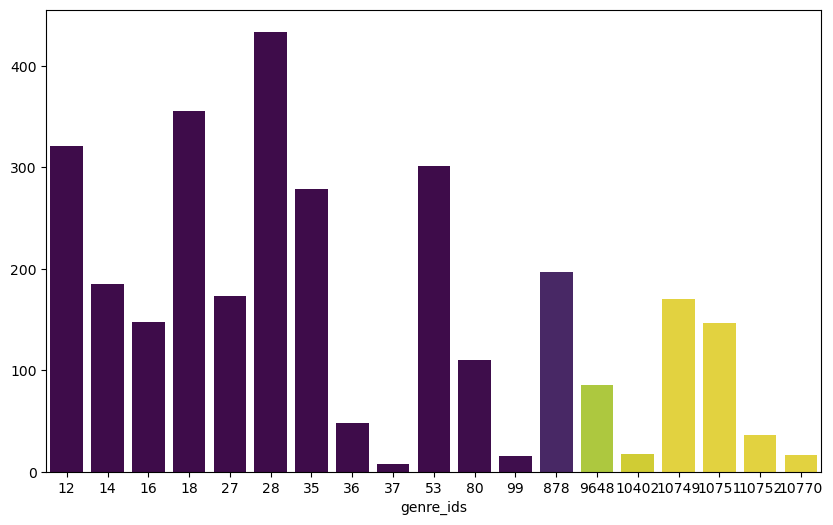

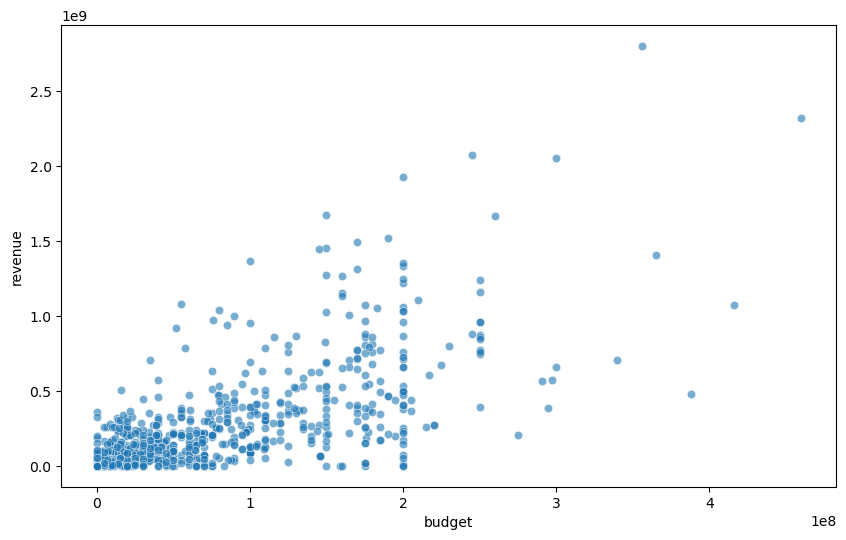

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

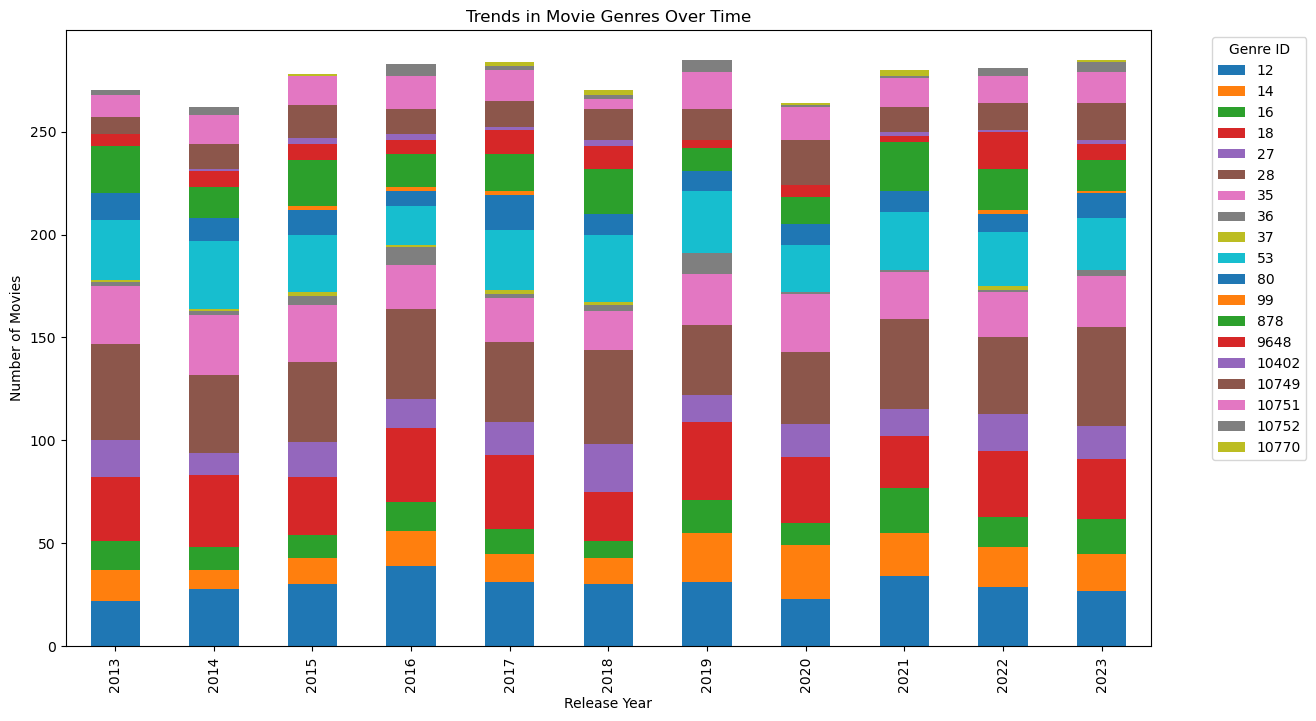

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode genre_ids (each movie can belong to multiple genres)
movies_df['genre_ids'] = movies_df['genre_ids'].apply(eval)  # Convert string to list
movies_exploded = movies_df.explode('genre_ids')

# Count genres by year
genre_year_counts = movies_exploded.groupby(['release_year', 'genre_ids']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 8))
genre_year_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Trends in Movie Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [50]:
print(movies_df.columns)

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'release_year', 'release_month'],
      dtype='object')


In [51]:
def fetch_movies(api_key, year, page=1):
    url = f'https://api.themoviedb.org/3/discover/movie?api_key={api_key}&sort_by=popularity.desc&primary_release_year={year}&page={page}&language=en-US'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()['results']
    else:
        print(f"Error fetching data for year {year}, page {page}: {response.status_code}")
        return []

In [52]:
print(movies_df.columns)

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'release_year', 'release_month'],
      dtype='object')


In [53]:
def fetch_movie_details(api_key, movie_id):
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching details for movie {movie_id}: {response.status_code}")
        return None

# Fetch additional details for each movie
movies_with_details = []
for movie in movies_data:
    movie_id = movie['id']
    details = fetch_movie_details(API_KEY, movie_id)
    if details:
        movies_with_details.append({**movie, **details})

# Convert to DataFrame
movies_df = pd.DataFrame(movies_with_details)

# Save to CSV
movies_df.to_csv('large_movies_data_with_details.csv', index=False)
print(f"Data saved to large_movies_data_with_details.csv. Total movies fetched: {len(movies_df)}")

Data saved to large_movies_data_with_details.csv. Total movies fetched: 1100


In [54]:
print(movies_df.columns)

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'origin_country', 'production_companies', 'production_countries',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline'],
      dtype='object')


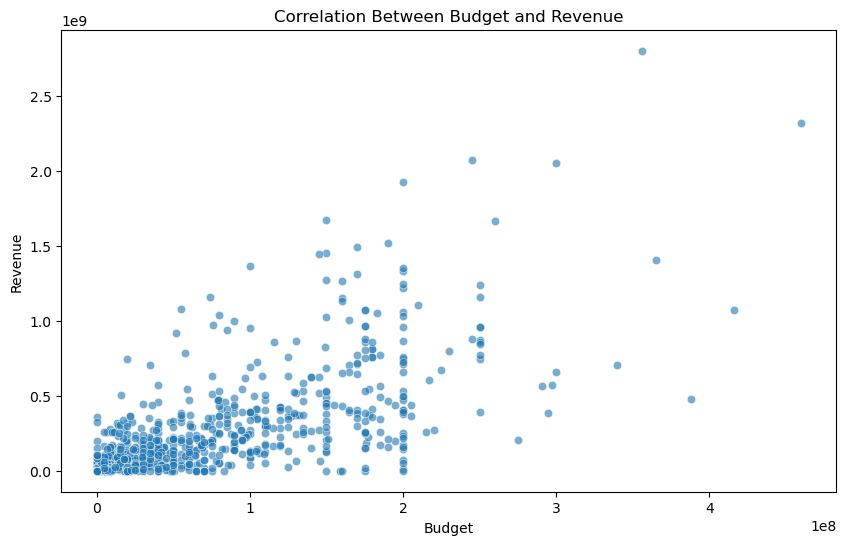

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter movies with budget and revenue data
budget_revenue_df = movies_df.dropna(subset=['budget', 'revenue'])

# Plot correlation between budget and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=budget_revenue_df, alpha=0.6)
plt.title('Correlation Between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

/var/folders/fm/_9mmz49j2fxdr8gyp41rhmz00000gn/T/ipykernel_46289/789996521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='title', data=top_movies, palette='viridis')


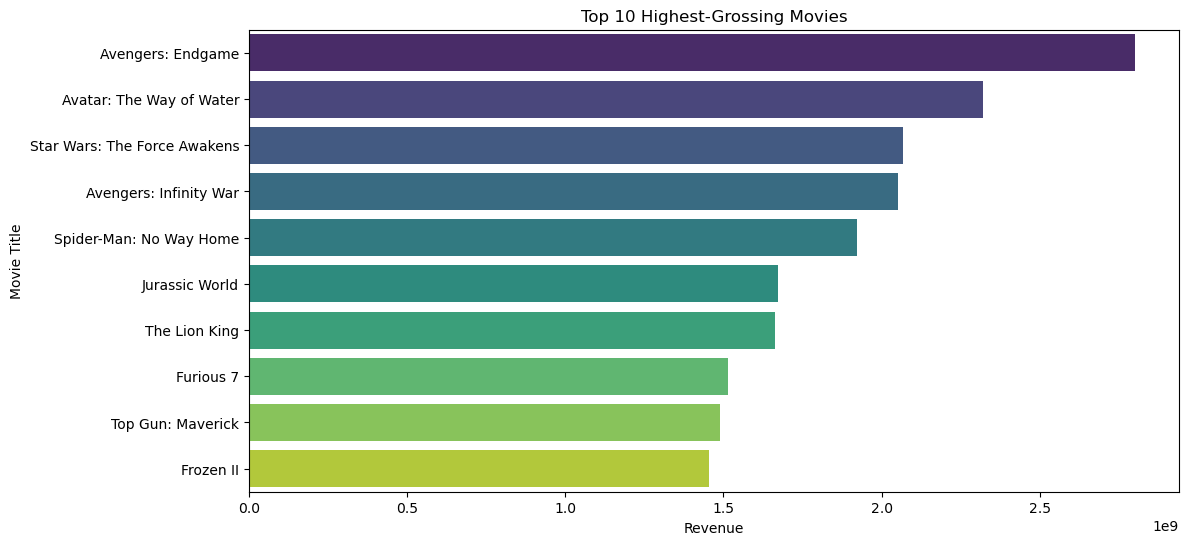

In [56]:
# Sort by revenue
top_movies = movies_df.sort_values(by='revenue', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='title', data=top_movies, palette='viridis')
plt.title('Top 10 Highest-Grossing Movies')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.show()

In [57]:
print(movies_df.columns)

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'origin_country', 'production_companies', 'production_countries',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline'],
      dtype='object')


In [58]:
import requests
import pandas as pd

# Replace with your TMDb API key
API_KEY = '2caf28e58a940eb268e5b3c9daba82d1'

# Function to fetch movie details
def fetch_movie_details(api_key, movie_id):
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching details for movie {movie_id}: {response.status_code}")
        return None

# Load your existing dataset
movies_df = pd.read_csv('large_movies_data.csv')

# Fetch additional details for each movie
movies_with_details = []
for index, row in movies_df.iterrows():
    movie_id = row['id']
    details = fetch_movie_details(API_KEY, movie_id)
    if details:
        # Merge the existing row with additional details
        movies_with_details.append({**row, **details})

# Convert to DataFrame
movies_df = pd.DataFrame(movies_with_details)

# Save to CSV
movies_df.to_csv('large_movies_data_with_details.csv', index=False)
print(f"Data saved to large_movies_data_with_details.csv. Total movies fetched: {len(movies_df)}")

Data saved to large_movies_data_with_details.csv. Total movies fetched: 1100


In [59]:
print(movies_df.columns)

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'title', 'video', 'vote_average', 'vote_count',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'origin_country', 'production_companies', 'production_countries',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline'],
      dtype='object')


In [60]:
# Check for missing values
print(movies_df[['budget', 'revenue']].isnull().sum())

# Drop rows where both budget and revenue are missing
movies_df.dropna(subset=['budget', 'revenue'], how='all', inplace=True)

# Fill missing values with 0 (if appropriate)
movies_df['budget'].fillna(0, inplace=True)
movies_df['revenue'].fillna(0, inplace=True)

budget     0
revenue    0
dtype: int64


/var/folders/fm/_9mmz49j2fxdr8gyp41rhmz00000gn/T/ipykernel_46289/2850855550.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df['budget'].fillna(0, inplace=True)
/var/folders/fm/_9mmz49j2fxdr8gyp41rhmz00000gn/T/ipykernel_46289/2850855550.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

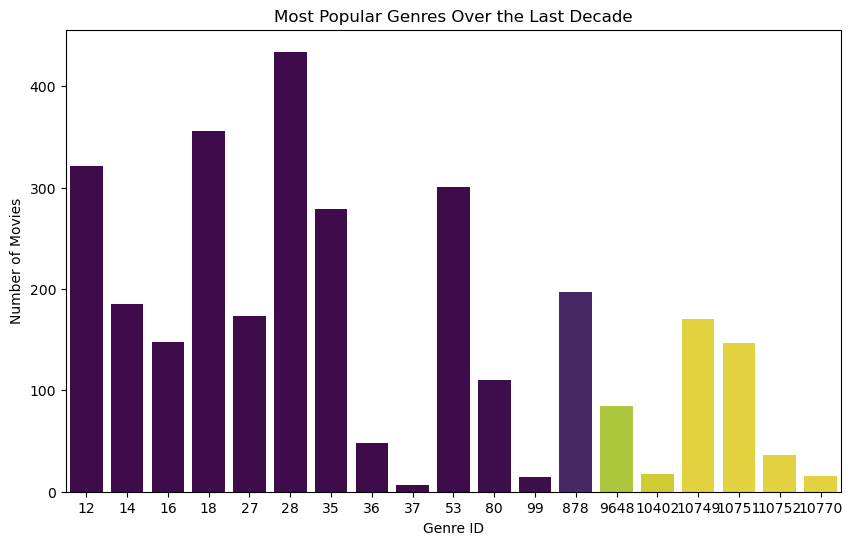

In [61]:
# Plot most popular genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('Most Popular Genres Over the Last Decade')
plt.xlabel('Genre ID')
plt.ylabel('Number of Movies')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

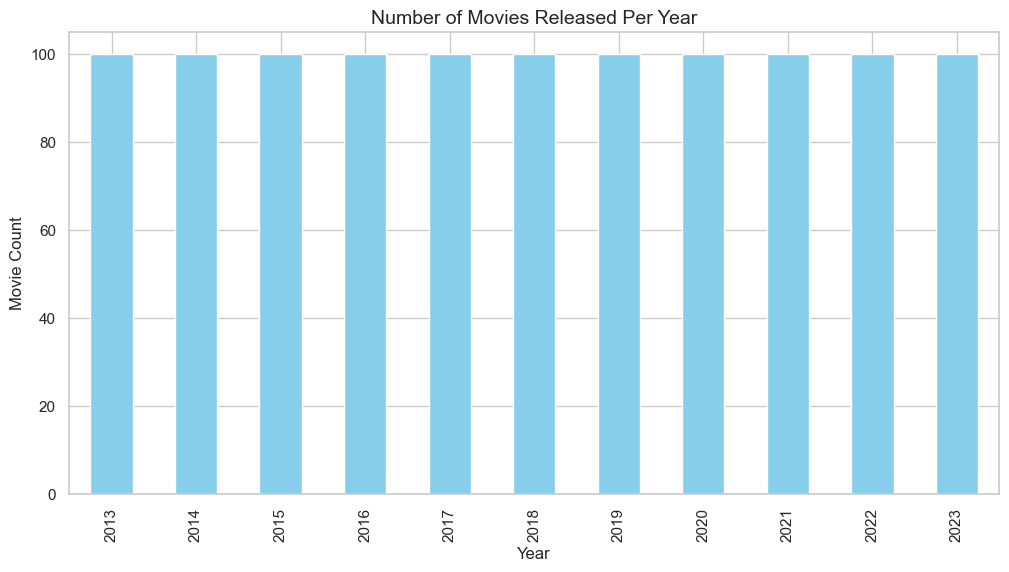

In [64]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Drop rows where release_date is NaT
movies_df = movies_df.dropna(subset=['release_date'])

# Extract release_year
movies_df['release_year'] = movies_df['release_date'].dt.year.astype("Int64")

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
movies_df['release_year'].value_counts().sort_index().plot(kind="bar", color='skyblue')
plt.title("Number of Movies Released Per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.show()

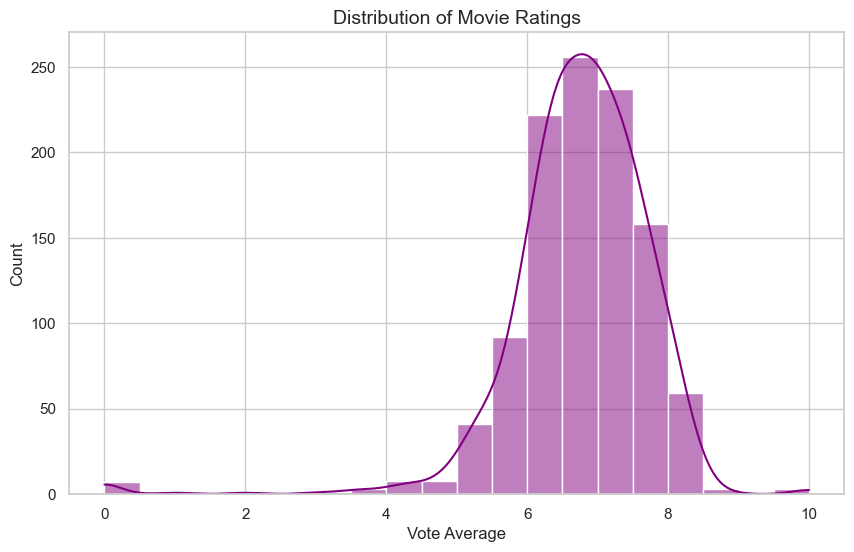

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['vote_average'], bins=20, kde=True, color='purple')
plt.title("Distribution of Movie Ratings", fontsize=14)
plt.xlabel("Vote Average")
plt.ylabel("Count")
plt.show()


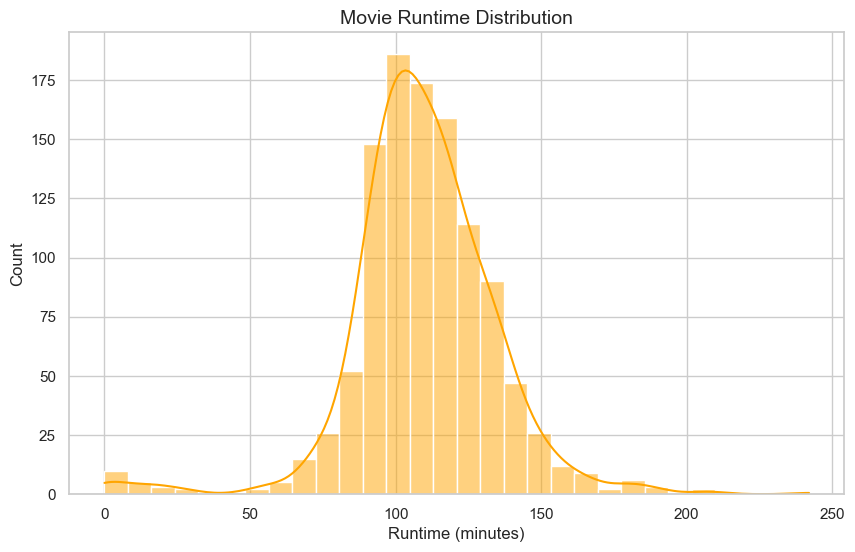

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['runtime'], bins=30, kde=True, color='orange')
plt.title("Movie Runtime Distribution", fontsize=14)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.show()

/var/folders/fm/_9mmz49j2fxdr8gyp41rhmz00000gn/T/ipykernel_46289/3466391739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_voted_movies['title'], x=top_voted_movies['vote_count'], palette="magma")


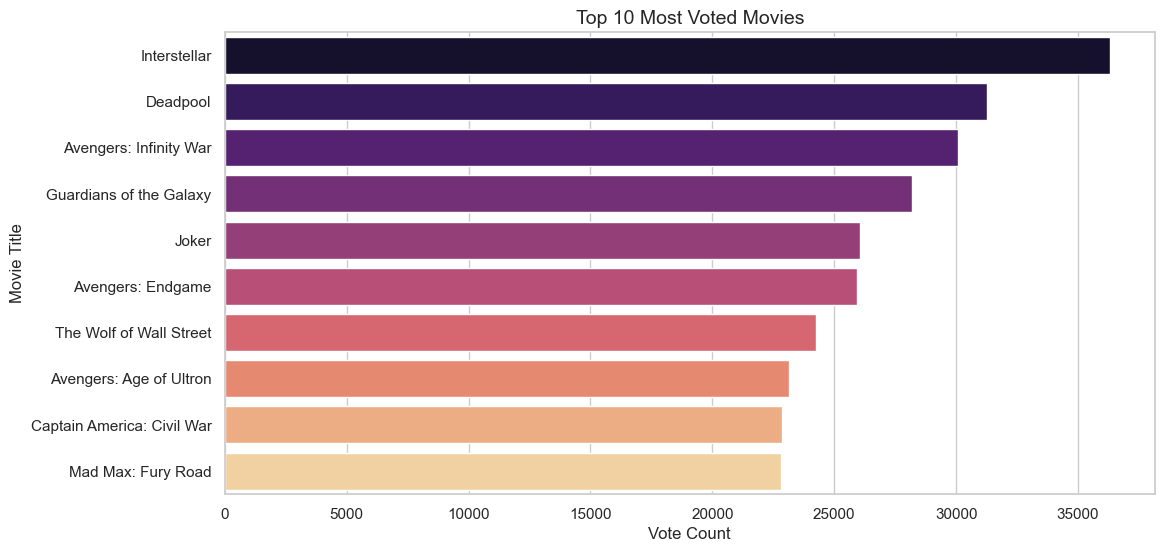

In [67]:
top_voted_movies = movies_df[['title', 'vote_count']].sort_values(by='vote_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_voted_movies['title'], x=top_voted_movies['vote_count'], palette="magma")
plt.title("Top 10 Most Voted Movies", fontsize=14)
plt.xlabel("Vote Count")
plt.ylabel("Movie Title")
plt.show()

/var/folders/fm/_9mmz49j2fxdr8gyp41rhmz00000gn/T/ipykernel_46289/2068392381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="viridis")


<Figure size 1200x600 with 0 Axes>

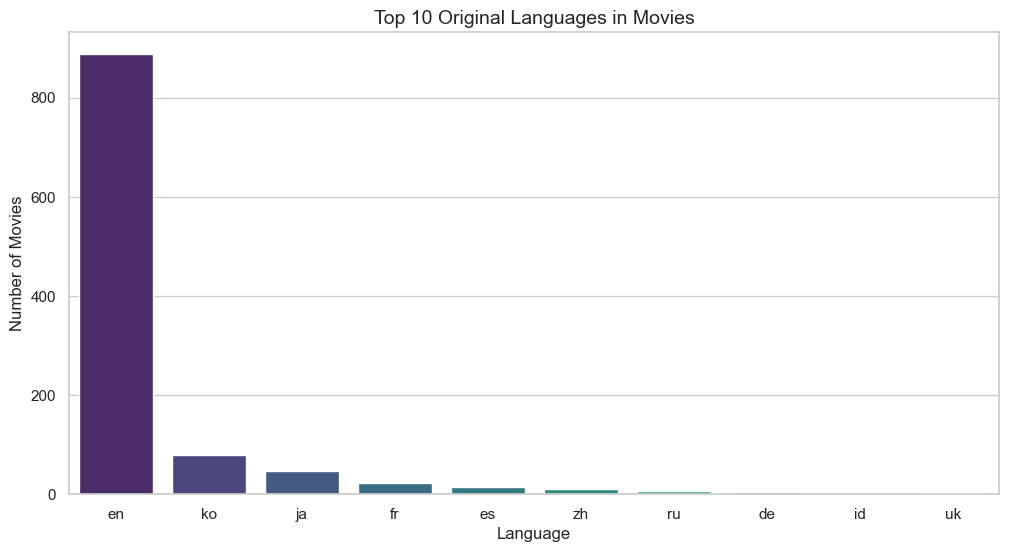

In [69]:
plt.figure(figsize=(12, 6))
lang_counts = movies_df['original_language'].value_counts()[:10]
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette="viridis")
plt.title("Top 10 Original Languages in Movies", fontsize=14)
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.show()


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

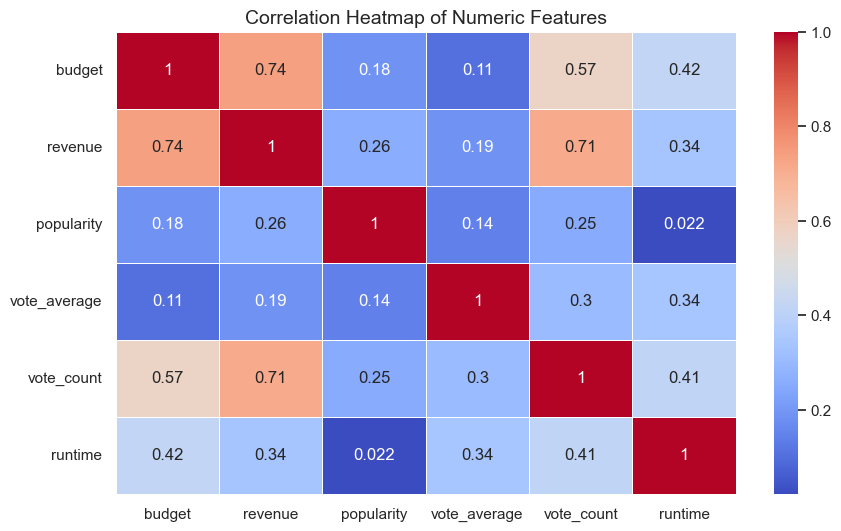

In [72]:
plt.figure(figsize=(10, 6))
corr = movies_df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()


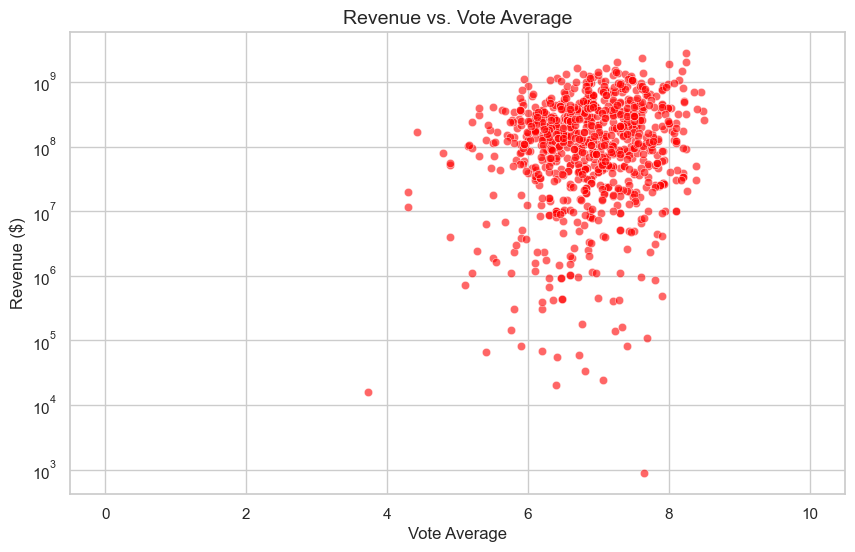

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='vote_average', y='revenue', alpha=0.6, color='red')
plt.title("Revenue vs. Vote Average", fontsize=14)
plt.xlabel("Vote Average")
plt.ylabel("Revenue ($)")
plt.yscale("log")
plt.show()

/var/folders/fm/_9mmz49j2fxdr8gyp41rhmz00000gn/T/ipykernel_46289/3185253068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=longest_runtime_movies['title'], x=longest_runtime_movies['runtime'], palette="plasma")


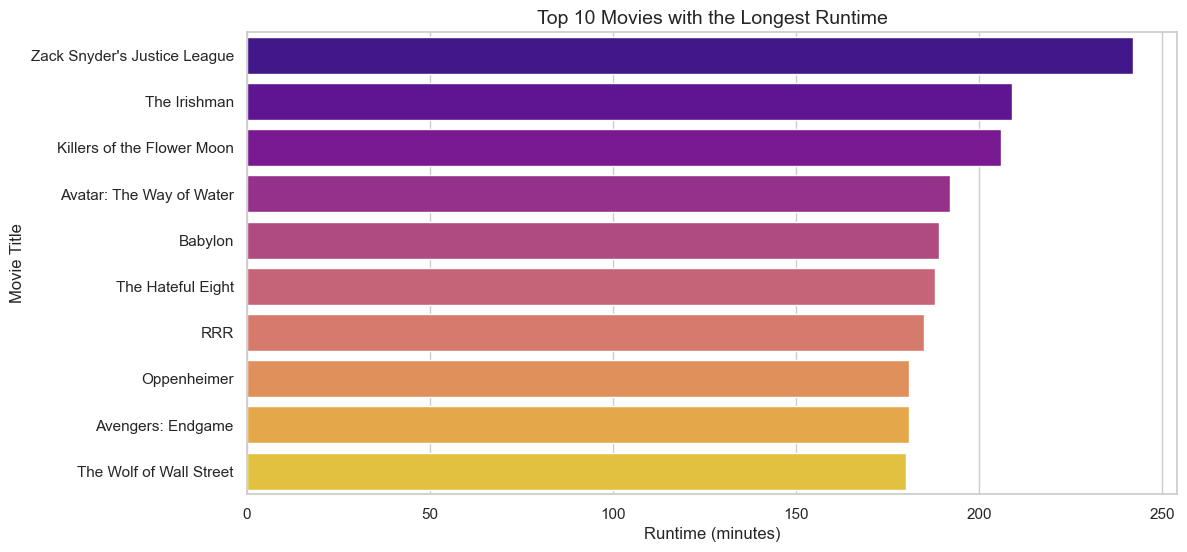

In [74]:
plt.figure(figsize=(12, 6))
longest_runtime_movies = movies_df[['title', 'runtime']].sort_values(by='runtime', ascending=False).head(10)
sns.barplot(y=longest_runtime_movies['title'], x=longest_runtime_movies['runtime'], palette="plasma")
plt.title("Top 10 Movies with the Longest Runtime", fontsize=14)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Movie Title")
plt.show()


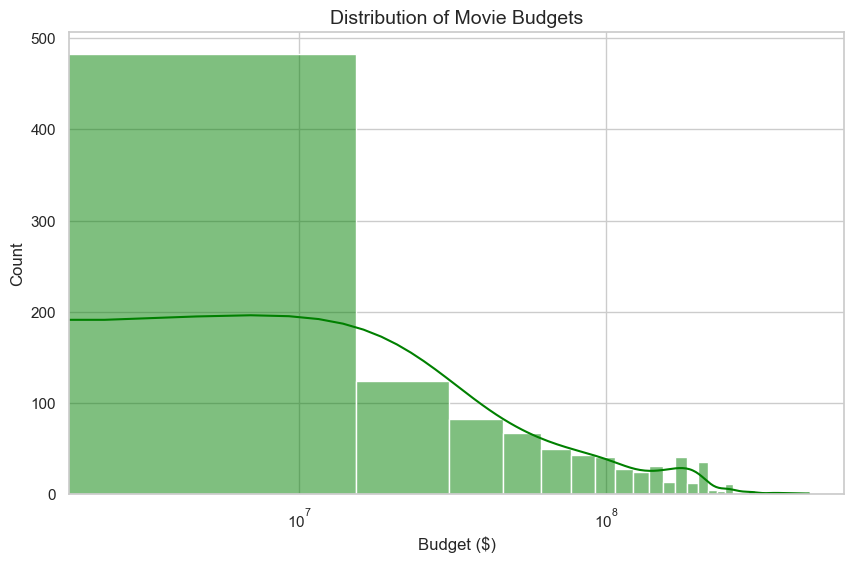

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['budget'], bins=30, kde=True, color='green')
plt.title("Distribution of Movie Budgets", fontsize=14)
plt.xlabel("Budget ($)")
plt.ylabel("Count")
plt.xscale("log")
plt.show()